In [3]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import pandas as pd
import geopandas as gdp
import fiona as fio
import sklearn as sk
from sklearn.linear_model import LinearRegression
import datetime as date
import itertools
import seaborn as sns
pallete = itertools.cycle(sns.color_palette())
pallete2 = itertools.cycle(sns.color_palette('husl', 9))
sns.set()

In [29]:
crimes = pd.read_csv('Crimes_-_2001_to_Present.csv')

In [13]:
crimes.shape

(1381777, 22)

In [38]:
crimes.head(5)

ID Case Number                    Date                  Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870   
2  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
3  10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE  0560   

  Primary Type              Description Location Description Arrest Domestic  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE  False     True   
1        THEFT           POCKET-PICKING              CTA BUS  False    False   
2        THEFT                OVER $500            RESIDENCE  False     True   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK   True    False   
4      ASSAULT                   SIMPLE            APARTMENT  False     True   

   ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate    Year  \
0  ...  12.0            61.0       08B     1165074.0    1875917.0  2015.0   
1  ...  29.0            25.0        06     1138875.0    1904869.0  2015.0   
2  ...   8.0            44.0        06           NaN          NaN  2018.0   
3  ...  35.0            21.0        18     1152037.0    1920384.0  2015.0   
4  ...  28.0            25.0       08A     1141706.0    1900086.0  2015.0   

               Updated On   Latitude  Longitude                       Location  
0  02/10/2018 03:50:01 PM  41.815117 -87.670000  (41.815117282, -87.669999562)  
1  02/10/2018 03:50:01 PM  41.895080 -87.765400  (41.895080471, -87.765400451)  
2  04/06/2019 04:04:43 PM        NaN        NaN                            NaN  
3  02/10/2018 03:50:01 PM  41.937406 -87.716650  (41.937405765, -87.716649687)  
4  02/10/2018 03:50:01 PM  41.881903 -87.755121  (41.881903443, -87.755121152)  

[5 rows x 22 columns]

In [22]:
checking_df = pd.DataFrame()

In [42]:
crimes['Date'] = crimes['Date'].apply(lambda x: date.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") if type(x)==str else x)
crimes['Date'] = crimes['Date1']
crimes['Year'] = crimes['Date'].dt.year
crimes['Day'] = crimes['Date'].dt.day
crimes['Month'] = crimes['Date'].dt.month
crimes['Hour'] = crimes['Date'].dt.hour


In [19]:
checking_df.Year.unique()

array([2015., 2018., 2016., 2014., 2001., 2020., 2019., 2012., 2017.,
       2013., 2011., 2007., 2003., 2010., 2008., 2009., 2002., 2005.,
       2006., 2004.,   nan])

In [21]:
#the dataset does not have the years from 2002-2015 well documented, and there is a drop off after 2018, luckily we can get the other years from chicagos website and repair the dataset a bit
crimes.groupby('Year').count().head(20)

ID  Case Number    Date   Block    IUCR  Primary Type  \
Year                                                                
2001.0  343594       343594  343594  343594  343594        343594   
2002.0    1764         1764    1764    1764    1764          1764   
2003.0      21           21      21      21      21            21   
2004.0       8            8       8       8       8             8   
2005.0      31           31      31      31      31            31   
2006.0      31           31      31      31      31            31   
2007.0      33           33      33      33      33            33   
2008.0      58           58      58      58      58            58   
2009.0      81           81      81      81      81            81   
2010.0     153          153     153     153     153           153   
2011.0     185          185     185     185     185           185   
2012.0     281          281     281     281     281           281   
2013.0     411          411     411     411     411           411   
2014.0     990          990     990     990     990           990   
2015.0  141832       141832  141832  141832  141832        141832   
2016.0  261614       261614  261614  261614  261614        261614   
2017.0  260398       260398  260398  260398  260398        260398   
2018.0  259173       259173  259173  259173  259173        259173   
2019.0   99910        99910   99910   99910   99910         99910   
2020.0   11205        11205   11205   11205   11205         11205   

        Description  Location Description  Arrest  Domestic  ...  FBI Code  \
Year                                                         ...             
2001.0       343594                343591  343594    343593  ...    343593   
2002.0         1764                  1764    1764      1764  ...      1764   
2003.0           21                    21      21        21  ...        21   
2004.0            8                     8       8         8  ...         8   
2005.0           31                    30      31        31  ...        31   
2006.0           31                    28      31        31  ...        31   
2007.0           33                    33      33        33  ...        33   
2008.0           58                    52      58        58  ...        58   
2009.0           81                    79      81        81  ...        81   
2010.0          153                   133     153       153  ...       153   
2011.0          185                   177     185       185  ...       185   
2012.0          281                   250     281       281  ...       281   
2013.0          411                   384     411       411  ...       411   
2014.0          990                   940     990       990  ...       990   
2015.0       141832                141673  141832    141832  ...    141832   
2016.0       261614                260761  261614    261614  ...    261614   
2017.0       260398                259472  260398    260398  ...    260398   
2018.0       259173                258464  259173    259173  ...    259173   
2019.0        99910                 99564   99910     99910  ...     99910   
2020.0        11205                 11149   11205     11205  ...     11205   

        X Coordinate  Y Coordinate  Updated On  Latitude  Longitude  Location  \
Year                                                                            
2001.0        343325        343325      343593    343325     343325    343325   
2002.0           449           449        1764       449        449       449   
2003.0             1             1          21         1          1         1   
2004.0             0             0           8         0          0         0   
2005.0             5             5          31         5          5         5   
2006.0             2             2          31         2          2         2   
2007.0             5             5          33         5          5         5   
2008.0             4             4          58 

In [25]:
crimes19 = pd.read_csv('Crimes_-_2019.csv')

In [28]:
crimes19.shape

(260586, 22)

In [ ]:
crimes19.head(5)

In [23]:
crimes20 = pd.read_csv('Crimes_-_2020.csv')

In [24]:
crimes20.shape

(210232, 22)

In [ ]:
crimes20.head(5)

In [8]:
crimes21 = pd.read_csv('Crimes_-_2021.csv')

In [12]:
crimes21.shape

(27133, 22)

In [ ]:
crimes21.head(5)

Now we see that that 2019, 2020, 2021, have more similar levels of crimes to 2018

In [40]:
crimes['Date'][0:3]

0    09/05/2015 01:30:00 PM
1    09/04/2015 11:30:00 AM
2    09/01/2018 12:01:00 AM
Name: Date, dtype: object

KeyError: 'Date'

In [ ]:
#filter out all of the years that are going to be duplicated
crimes.drop(crimes[crimes['Year'] == 2020].index, inplace = True)
crimes.drop(crimes[crimes['Year'] == 2019].index, inplace = True)

In [11]:
crimes_combined = pd.merge(left = crimes, right = crimes21, how = 'left')

In [ ]:
crimes_combined.head()

In [253]:
crimes_dict = {}
#Primary Types
robbery = crimes[crimes['Primary Type']== 'ROBBERY']\
    .reset_index()
crimes_dict['robbery'] = robbery
theft = crimes[crimes['Primary Type']=='THEFT']\
    .reset_index()
crimes_dict['theft'] = theft
battery = crimes[crimes['Primary Type'] == 'BATTERY']\
    .reset_index()
crimes_dict['battery']= battery
burglary = crimes[crimes['Primary Type'] == 'BURGLARY']\
    .reset_index()
crimes_dict['burglary'] = burglary 
criminal_damage = crimes[crimes['Primary Type'] == 'CRIMINAL DAMAGE']\
    .reset_index()
crimes_dict['criminal_damage'] = criminal_damage
other = crimes[crimes['Primary Type'] == 'OTHER OFFENSE']\
    .reset_index()
crimes_dict['other'] = other
arson = crimes[crimes['Primary Type'] == 'ARSON']\
    .reset_index()
crimes_dict['arson'] = arson

homicide =  crimes[crimes['Primary Type']=='HOMICIDE']\
    .reset_index()
crimes_dict['homicide'] = homicide


#domestic crimes should be treated differently from the rest since they are filtered by description and not primary type, so there is overlap
domestic_crimes = crimes[crimes['Description'].str.contains('DOMESTIC', na = False)]\
    .reset_index()
crimes_dict['domestic_crimes'] = domestic_crimes
full_crimes_dict['domestic_crimes'] = domestic_crimes

In [254]:
for key, value in crimes_dict.items():
    print(key, value.shape)

robbery (54771, 23)
theft (310462, 23)
battery (260369, 23)
burglary (68538, 23)
criminal_damage (155421, 23)
other (90277, 23)
arson (2398, 23)
homicide (747, 23)
domestic_crimes (105437, 23)


In [255]:
domestic_crimes.head()

index        ID Case Number                    Date                 Block  \
0      0  10224738    HY411648  09/05/2015 01:30:00 PM       043XX S WOOD ST   
1     13  10224751    HY411566  09/05/2015 12:50:00 PM       013XX E 47TH ST   
2     15  10224753    HY411489  09/05/2015 11:45:00 AM    080XX S JUSTINE ST   
3     19  10224758    HY411568  09/05/2015 12:35:00 PM      059XX W GRACE ST   
4     26  10224766    HY411198  09/05/2015 06:20:00 AM  075XX S PHILLIPS AVE   

   IUCR Primary Type                                     Description  \
0  0486      BATTERY                         DOMESTIC BATTERY SIMPLE   
1  0486      BATTERY                         DOMESTIC BATTERY SIMPLE   
2  0497      BATTERY  AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON   
3  0486      BATTERY                         DOMESTIC BATTERY SIMPLE   
4  0486      BATTERY                         DOMESTIC BATTERY SIMPLE   

  Location Description Arrest  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE  False  ...  12.0            61.0       08B   
1               STREET  False  ...   4.0            39.0       08B   
2            APARTMENT  False  ...  21.0            71.0       04B   
3               STREET  False  ...  38.0            15.0       08B   
4            APARTMENT  False  ...   7.0            43.0       08B   

   X Coordinate  Y Coordinate    Year              Updated On   Latitude  \
0     1165074.0     1875917.0  2015.0  02/10/2018 03:50:01 PM  41.815117   
1     1185907.0     1874105.0  2015.0  02/10/2018 03:50:01 PM  41.809678   
2     1167400.0     1851512.0  2015.0  02/10/2018 03:50:01 PM  41.748097   
3     1136014.0     1924656.0  2015.0  02/10/2018 03:50:01 PM  41.949430   
4     1193840.0     1855495.0  2015.0  02/10/2018 03:50:01 PM  41.758420   

   Longitude                       Location  
0 -87.670000  (41.815117282, -87.669999562)  
1 -87.593639  (41.809678314, -87.593638934)  
2 -87.662166  (41.748097343, -87.662166183)  
3 -87.775436  (41.949429769, -87.775435529)  
4 -87.565152  (41.758420222, -87.565152335)  

[5 rows x 23 columns]

In [257]:
crimes_dict['robbery']['Date'][0]

'09/05/2015 11:30:00 AM'

In [258]:
#convert dates and get times of day
for key, crime in crimes_dict.items():
    crime['Date'] = crime['Date'].apply(lambda x: date.datetime.strptime(x,  "%m/%d/%Y %I:%M:%S %p"))
    crime['Year'] = crime['Date'].dt.year
    crime['Day'] = crime['Date'].dt.day
    crime['Month'] = crime['Date'].dt.month
    crime['Hour'] = crime['Date'].dt.hour
    crime['Day of Week'] = crime['Date'].dt.dayofweek
    

In [259]:
crimes_dict['robbery']['Date'][0]

Timestamp('2015-09-05 11:30:00')

In [240]:
crimes_dict['robbery'].groupby(['Year', 'Hour'])['Primary Type']\
    .value_counts().unstack().reset_index()

Primary Type  Year  Hour  ROBBERY
0             2001     1     1177
1             2001     2     1127
2             2001     3     1054
3             2001     4     1031
4             2001     5      940
..             ...   ...      ...
97            2020     8       44
98            2020     9       37
99            2020    10       43
100           2020    11       37
101           2020    12       38

[102 rows x 3 columns]

In [244]:
crimes_dict['robbery']['Primary Type'][0]

'ROBBERY'

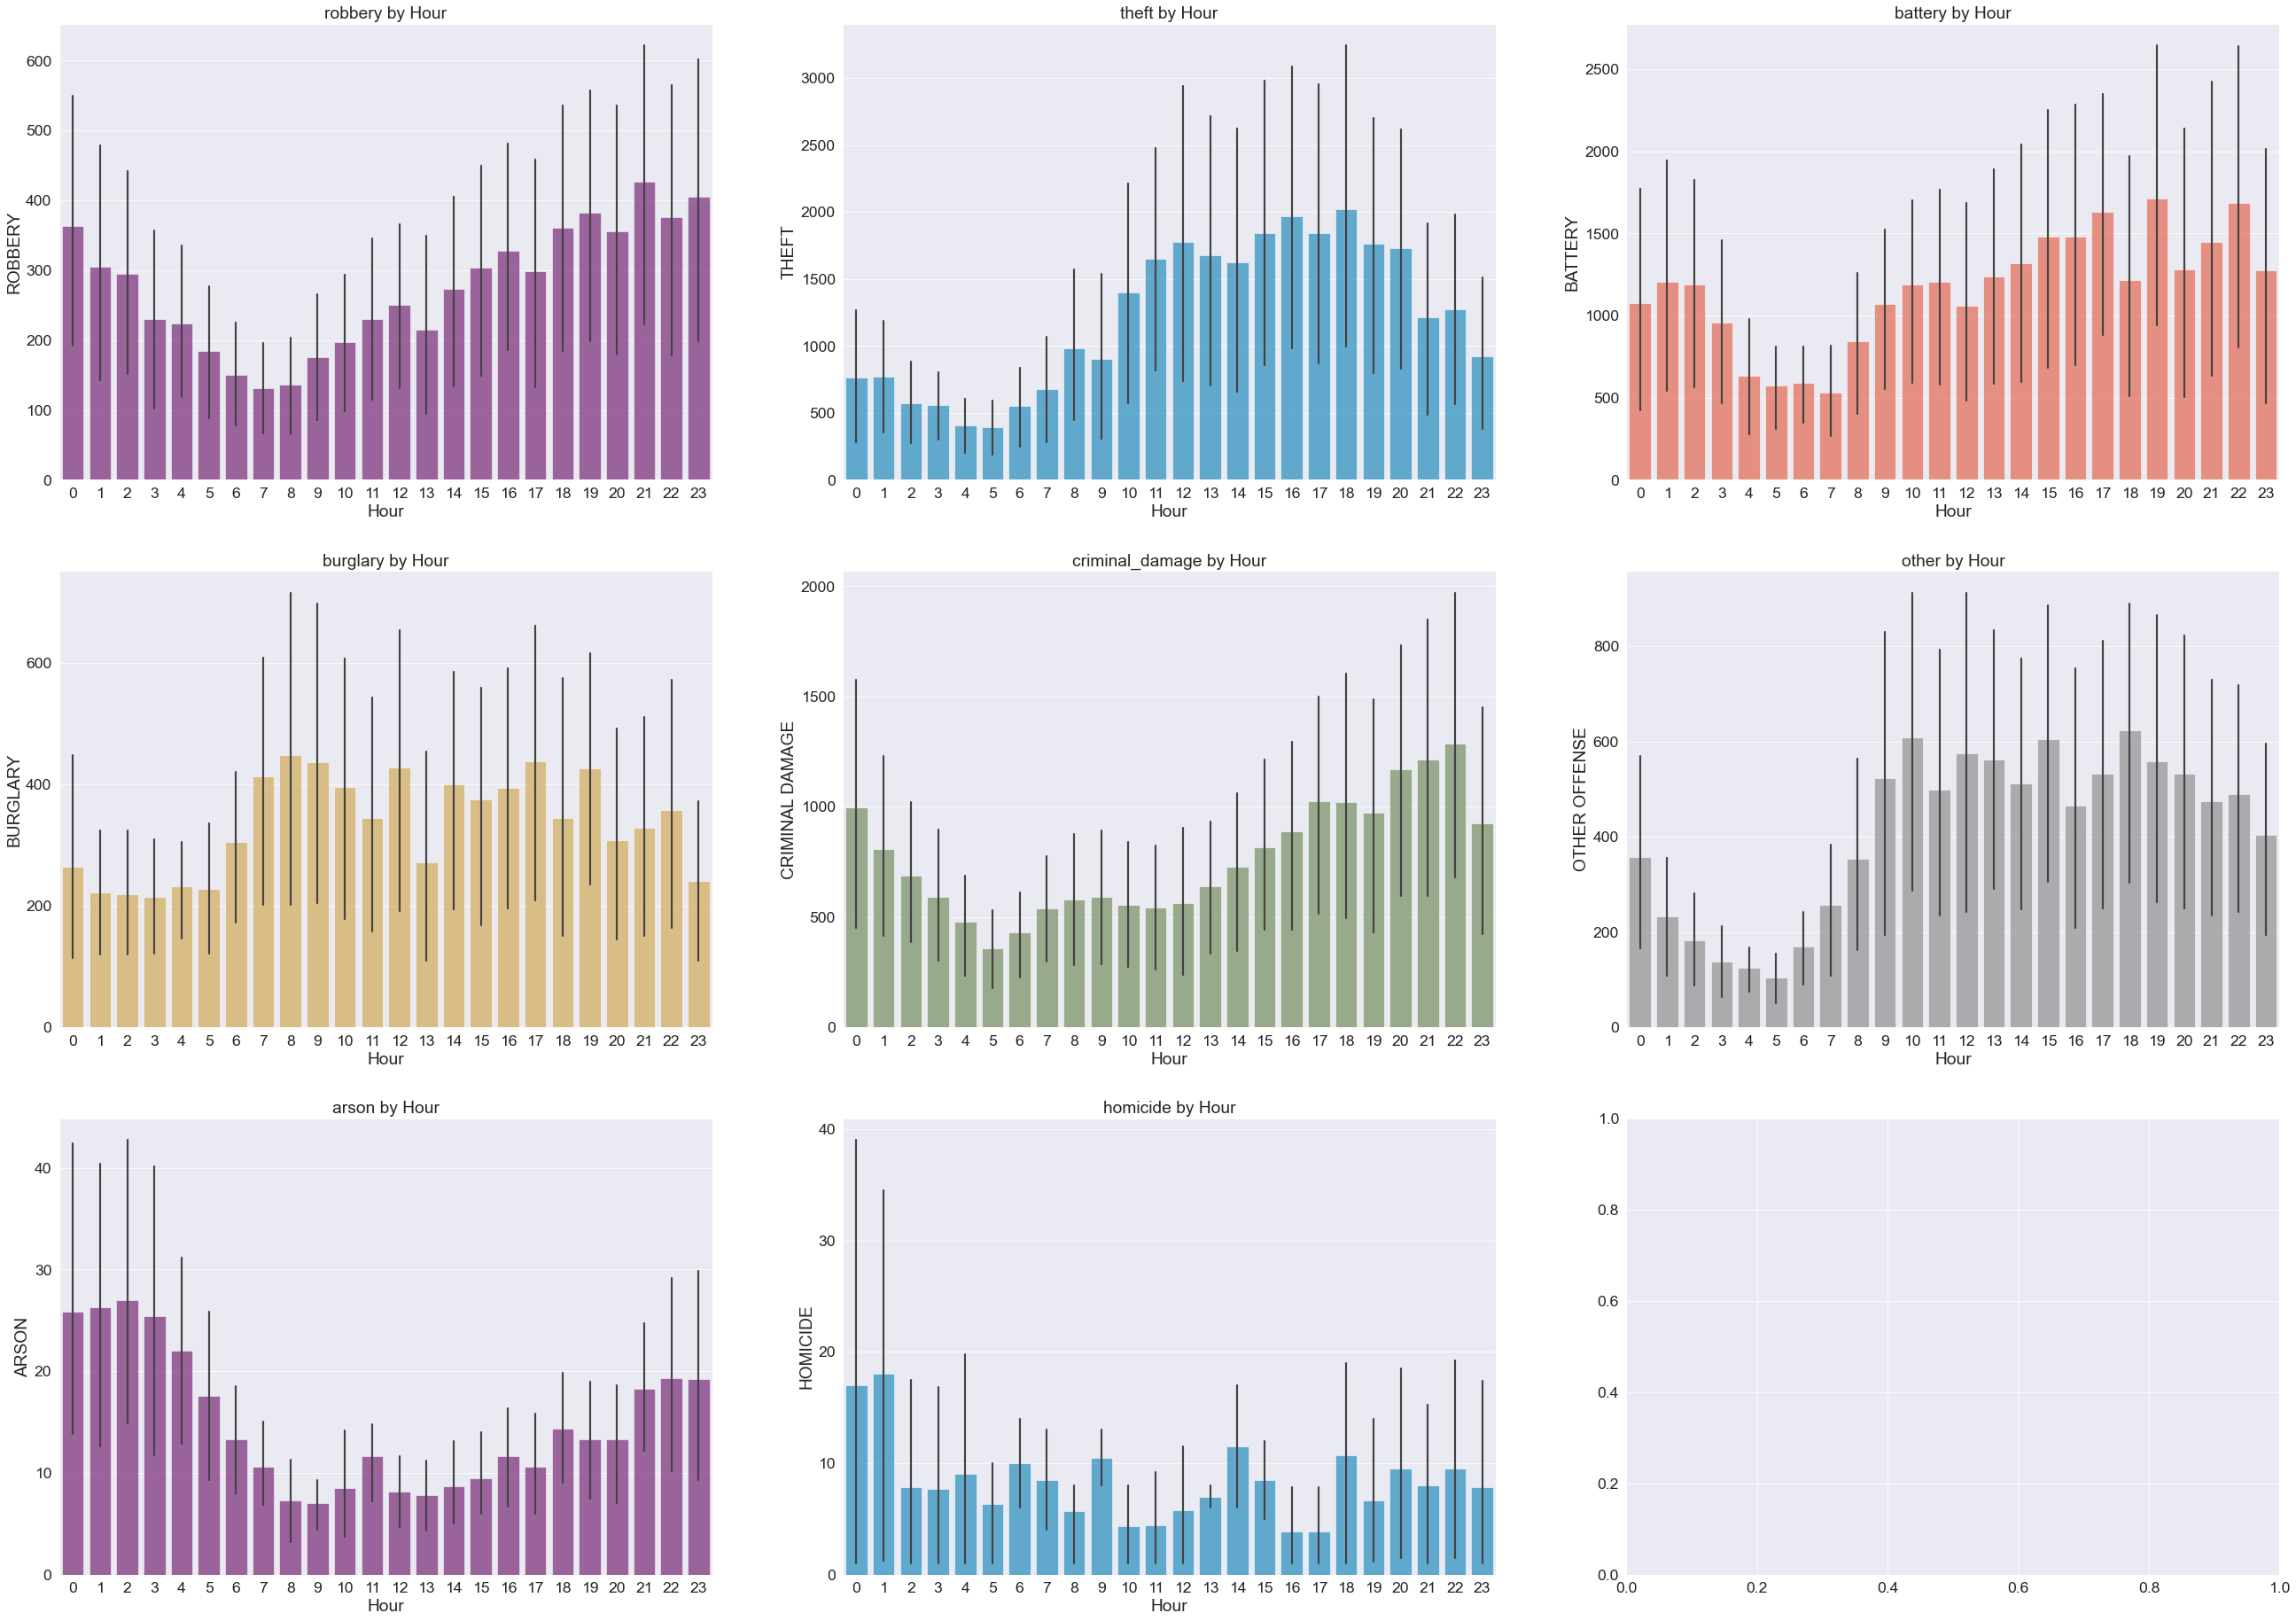

In [564]:
with sns.plotting_context('paper', font_scale = 2):
    i = 0
    fig, axes = plots.subplots(3,3, figsize= (40, 30))
    axes = axes.flatten()
    for key, crime in crimes_dict.items():
        if key !=  'domestic_crimes':
            df = crime.groupby(['Year', 'Hour'])['Primary Type'].value_counts().unstack().reset_index()
            fig = sns.barplot(ax  = axes[i], data = df, x= 'Hour', y= crime['Primary Type'][0], color = next(pallete), alpha= .66)
            axes[i].set(title = f'{key} by Hour')
            i+=1

In [9]:
#Going through the dataset it looked like there were a lot of null values so I'm trying to fill them is
#get all the rows

#all of the columns that are empty
null_columns = []
#dictionary with all of the dataframes of null values
null_data = {}
for key, value in crimes_dict.items():
    null_key = str(key)+'_null'
    null_columns+=[x for x in value.columns if value[x].isnull().any()]
    null_value = value.isnull().any(axis = 'columns')
    null_data[null_key] = crimes_dict[key][null_value]
    print(null_key, null_data[null_key].shape)
columns_to_clean=  set(null_columns)
print(columns_to_clean)

robbery_null (12891, 23)
theft_null (69698, 23)
battery_null (66720, 23)
burglary_null (18189, 23)
criminal_damage_null (40516, 23)
other_null (22366, 23)
arson_null (737, 23)
domestic_crimes_null (96, 23)
{'Longitude', 'Y Coordinate', 'District', 'X Coordinate', 'Latitude', 'Location Description', 'Community Area', 'Ward', 'Location'}


In [10]:
burglary = crimes_dict['burglary']
burglary_null = null_data['burglary_null']
burglary_null[columns_to_clean]
#it seems like there are a lot of problems in the location data specifically 
#so we need to figure out a way to transform the data based on the block data
#here is a trial that I can then apply to the whole dictionary

burglary_null['Ward']

21       18.0
38        7.0
86        9.0
146      27.0
232      42.0
         ... 
68533     NaN
68534     NaN
68535     NaN
68536     NaN
68537     NaN
Name: Ward, Length: 18189, dtype: float64

In [11]:
burglary['Ward'] = burglary.groupby('Block')['Ward'].transform(lambda x: x.fillna(x.mode()))

In [160]:
burglary.loc[68537]


index                                         1381761
ID                                            1663466
Case Number                                   G447855
Date                           07/30/2001 05:31:42 AM
Block                            041XX W ROOSEVELT RD
IUCR                                             0620
Primary Type                                 BURGLARY
Description                            UNLAWFUL ENTRY
Location Description                   CLEANING STORE
Arrest                                          false
Domestic                                        False
Beat                                           1132.0
District                                         11.0
Ward                                              NaN
Community Area                                    NaN
FBI Code                                           05
X Coordinate                                1148607.0
Y Coordinate                                1894415.0
Year                        

In [187]:
#create a rounded Locataion
#from stack overflow
'''
decimal  degrees    distance
places
-------------------------------  
0        1.0        111 km
1        0.1        11.1 km
2        0.01       1.11 km
3        0.001      111 m
4        0.0001     11.1 m
5        0.00001    1.11 m
6        0.000001   0.111 m
7        0.0000001  1.11 cm
8        0.00000001 1.11 mm
'''
lat_rounded = burglary['Latitude'].apply(lambda x: '{0:.{1}f}'.format(x, 3))
long_rounded = burglary['Longitude'].apply(lambda x: '{0:.{1}f}'.format(x, 3))
burglary['lat_rounded'] = lat_rounded
burglary['long_rounded'] = long_rounded

#keep trailing 0s 
burglary['Location_Rounded'] = list(zip(lat_rounded, long_rounded))
burglary

index        ID Case Number                    Date  \
0            5  10224742    HY411435  09/05/2015 10:55:00 AM   
1            6  10224743    HY411629  09/04/2015 06:00:00 PM   
2           17  10224756    HY410094  07/08/2015 12:00:00 AM   
3           18  10224757    HY411388  09/05/2015 09:55:00 AM   
4           32  10224773    HY411685  09/05/2015 07:00:00 AM   
...        ...       ...         ...                     ...   
68533  1381669   1663354     G447612  07/29/2001 10:00:00 PM   
68534  1381684   1663373     G449701  07/30/2001 08:30:00 AM   
68535  1381692   1663381     G451546  07/31/2001 09:00:00 AM   
68536  1381695   1663387     G452099  07/23/2001 04:00:00 PM   
68537  1381761   1663466     G447855  07/30/2001 05:31:42 AM   

                      Block  IUCR Primary Type     Description  \
0       082XX S LOOMIS BLVD  0610     BURGLARY  FORCIBLE ENTRY   
1      021XX W CHURCHILL ST  0620     BURGLARY  UNLAWFUL ENTRY   
2      103XX S TORRENCE AVE  0620     BURGLARY  UNLAWFUL ENTRY   
3        088XX S PAULINA ST  0610     BURGLARY  FORCIBLE ENTRY   
4         029XX W FIFTH AVE  0620     BURGLARY  UNLAWFUL ENTRY   
...                     ...   ...          ...             ...   
68533    073XX S STEWART AV  0610     BURGLARY  FORCIBLE ENTRY   
68534   042XX N LOCKWOOD AV  0610     BURGLARY  FORCIBLE ENTRY   
68535         043XX W 18 ST  0610     BURGLARY  FORCIBLE ENTRY   
68536      065XX N NIXON AV  0620     BURGLARY  UNLAWFUL ENTRY   
68537  041XX W ROOSEVELT RD  0620     BURGLARY  UNLAWFUL ENTRY   

      Location Description Arrest  ... X Coordinate  Y Coordinate    Year  \
0                RESIDENCE  False  ...    1168430.0     1850165.0  2015.0   
1         RESIDENCE-GARAGE  False  ...    1161628.0     1912157.0  2015.0   
2                    OTHER  False  ...    1195508.0     1836950.0  2015.0   
3                RESIDENCE   True  ...    1166554.0     1846067.0  2015.0   
4                APARTMENT  False  ...    1156926.0     1899592.0  2015.0   
...                    ...    ...  ...          ...           ...     ...   
68533            APARTMENT  false  ...    1174929.0     1856502.0  2001.0   
68534            RESIDENCE  false  ...    1140295.0     1927772.0  2001.0   
68535            RESIDENCE  false  ...    1147582.0     1891059.0  2001.0   
68536     RESIDENCE-GARAGE  false  ...    1128049.0     1943441.0  2001.0   
68537       CLEANING STORE  false  ...    1148607.0     1894415.0  2001.0   

                   Updated On   Latitude  Longitude  \
0      02/10/2018 03:50:01 PM  41.744379 -87.658431   
1      02/10/2018 03:50:01 PM  41.914636 -87.681631   
2      02/10/2018 03:50:01 PM  41.707490 -87.559650   
3      02/10/2018 03:50:01 PM  41.733174 -87.665421   
4      02/10/2018 03:50:01 PM  41.880253 -87.699247   
...                       ...        ...        ...   
68533  08/17/2015 03:03:40 PM  41.761626 -87.634429   
68534  08/17/2015 03:03:40 PM  41.957903 -87.759622   
68535  08/17/2015 03:03:40 PM  41.857022 -87.733776   
68536  08/17/2015 03:03:40 PM  42.001116 -87.804288   
68537  08/17/2015 03:03:40 PM  41.866211 -87.729927   

                            Location   Location_Rounded  lat_rounded  \
0      (41.744378879, -87.658430635)  (41.744, -87.658)       41.744   
1      (41.914635603, -87.681630909)  (41.915, -87.682)       41.915   
2      (41.707490122, -87.559650325)  (41.707, -87.560)       41.707   
3      (41.733173536, -87.665421067)  (41.733, -87.665)       41.733   
4       (41.880252868, -87.69924661)  (41.880, -87.699)       41.880   
...                              ...                ...          ...   
68533  (41.761626039, -87.634428985)  (41.762, -87.634)       41.762   
68534  (41.957902816, -87.759622271)  (41.958, -87.760)       41.958   
68535  (41.857021604, -87.733775858)  (41.857, -87.734)       41.857   
68536  (42.001116282, -87.804287884)  (42.001, -87.804)       42.001   
68537  (41.866211176, -87.729926921)  (41.866, -87.730)       41.866 

In [190]:
burglary['Ward'] = burglary.groupby(['lat_rounded', 'long_rounded'])['Ward'].transform(lambda x: x.fillna(x.mode()))

In [182]:
burglary['Ward']

0        21.0
1        32.0
2        10.0
3        21.0
4         2.0
         ... 
68533     NaN
68534     NaN
68535     NaN
68536     NaN
68537     NaN
Name: Ward, Length: 68538, dtype: float64

In [188]:
burglary['Ward'] = burglary.groupby('Location_Rounded')['Ward'].transform(lambda x: x.fillna(x.mode()))

In [191]:
burglary['Ward']

0        21.0
1        32.0
2        10.0
3        21.0
4         2.0
         ... 
68533     NaN
68534     NaN
68535     NaN
68536     NaN
68537     NaN
Name: Ward, Length: 68538, dtype: float64

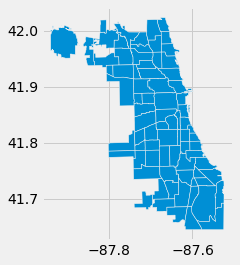

In [263]:
Map = gdp.read_file('ChicagoShapeFile.shp')
Map.plot()
n = Map.shape[0]
areaNumber = []
for i in range(n):
    areaNumber.append(float(Map['area_num_1'][i]))
Map['Area Number'] = areaNumber

In [261]:
def AssignSidesMap(data):
    Sides = []
    n = data.shape[0]
    for i in range(n):
        if data['Area Number'][i] <= 4 or (data['Area Number'][i] >=9 and data['Area Number'][i] <=14) or data['Area Number'][i] >= 76:
            Sides.append('Far North Side')
        elif (data['Area Number'][i]<=7 and data['Area Number'][i] >=5) or (data['Area Number'][i]>=21 and data['Area Number'][i]<=22):
            Sides.append('North Side')
        elif (data['Area Number'][i] >= 15 and data['Area Number'][i] <= 20):
            Sides.append('Northwest Side')
        elif data['Area Number'][i] == 8 or (data['Area Number'][i] >= 32 and data['Area Number'][i] <= 33):
            Sides.append('Central')
        elif (data['Area Number'][i] >= 23 and data['Area Number'][i] <= 31):
            Sides.append('West Side')
        elif (data['Area Number'][i] >= 34 and data['Area Number'][i] <= 43) or data['Area Number'][i] == 60 or data['Area Number'][i] == 69:
            Sides.append('South Side')
        elif (data['Area Number'][i] >= 56 and data['Area Number'][i] <= 59) or (data['Area Number'][i] >= 61 and data['Area Number'][i] <=68):
            Sides.append('Southwest Side')
        elif (data['Area Number'][i] >= 70 and data['Area Number'][i] <= 75):
            Sides.append(
        elif (data['Area Number'][i] >= 44 and data['Area Number'][i] <= 55):
            Sides.append('Far Southeast Side')
        else:
            Sides.append('None')
    data['Side'] = Sides

In [288]:
def AssignSides(data):
    if data <= 4 or (data >=9 and data <=14) or data >= 76:
        return 'Far North Side'
    elif (data <=7 and data >=5) or (data>=21 and data<=22):
        return 'North Side'
    elif (data >= 15 and data <= 20):
        return 'Northwest Side'
    elif data == 8 or (data >= 32 and data <= 33):
        return 'Central'
    elif (data >= 23 and data <= 31):
        return 'West Side'
    elif (data >= 34 and data <= 43) or data == 60 or data == 69:
        return 'South Side'
    elif (data >= 56 and data <= 59) or (data >= 61 and data <=68):
        return 'Southwest Side'
    elif (data >= 70 and data <= 75):
        return 'Far Southwest Side'
    elif (data >= 44 and data <= 55):
        return 'Far Southeast Side'
    else:
        return 'None'
#data['Side'] = Sides

In [289]:

for key, value in crimes_dict.items():
    value['Side']= value['Community Area'].apply(AssignSides2)

In [366]:
temp = crimes_dict['battery'].groupby('Month').count()
temp.reset_index(inplace = True)
temp

Month  index     ID  Case Number   Date  Block   IUCR  Primary Type  \
0       1  20203  20203        20203  20203  20203  20203         20203   
1       2  18885  18885        18885  18885  18885  18885         18885   
2       3  24950  24950        24950  24950  24950  24950         24950   
3       4  24279  24279        24279  24279  24279  24279         24279   
4       5  26247  26247        26247  26247  26247  26247         26247   
5       6  22980  22980        22980  22980  22980  22980         22980   
6       7  25159  25159        25159  25159  25159  25159         25159   
7       8  26316  26316        26316  26316  26316  26316         26316   
8       9  23691  23691        23691  23691  23691  23691         23691   
9      10  18582  18582        18582  18582  18582  18582         18582   
10     11  14411  14411        14411  14411  14411  14411         14411   
11     12  14666  14666        14666  14666  14666  14666         14666   

    Description  Location Description  ...  Y Coordinate   Year  Updated On  \
0         20203                 20203  ...         20183  20203       20203   
1         18885                 18885  ...         18867  18885       18885   
2         24950                 24949  ...         24924  24950       24950   
3         24279                 24279  ...         24240  24279       24279   
4         26247                 26247  ...         26218  26247       26247   
5         22980                 22980  ...         22952  22980       22980   
6         25159                 25159  ...         25128  25159       25159   
7         26316                 26316  ...         26285  26316       26316   
8         23691                 23691  ...         23662  23691       23691   
9         18582                 18582  ...         18555  18582       18582   
10        14411                 14411  ...         14385  14411       14411   
11        14666                 14666  ...         14646  14666       14666   

    Latitude  Longitude  Location    Day   Hour  Day of Week   Side  
0      20183      20183     20183  20203  20203        20203  20203  
1      18867      18867     18867  18885  18885        18885  18885  
2      24924      24924     24924  24950  24950        24950  24950  
3      24240      24240     24240  24279  24279        24279  24279  
4      26218      26218     26218  26247  26247        26247  26247  
5      22952      22952     22952  22980  22980        22980  22980  
6      25128      25128     25128  25159  25159        25159  25159  
7      26285      26285     26285  26316  26316        26316  26316  
8      23662      23662     23662  23691  23691        23691  23691  
9      18555      18555     18555  18582  18582        18582  18582  
10     14385      14385     14385  14411  14411        14411  14411  
11     14646      14646     14646  14666  14666        14666  14666  

[12 rows x 28 columns]

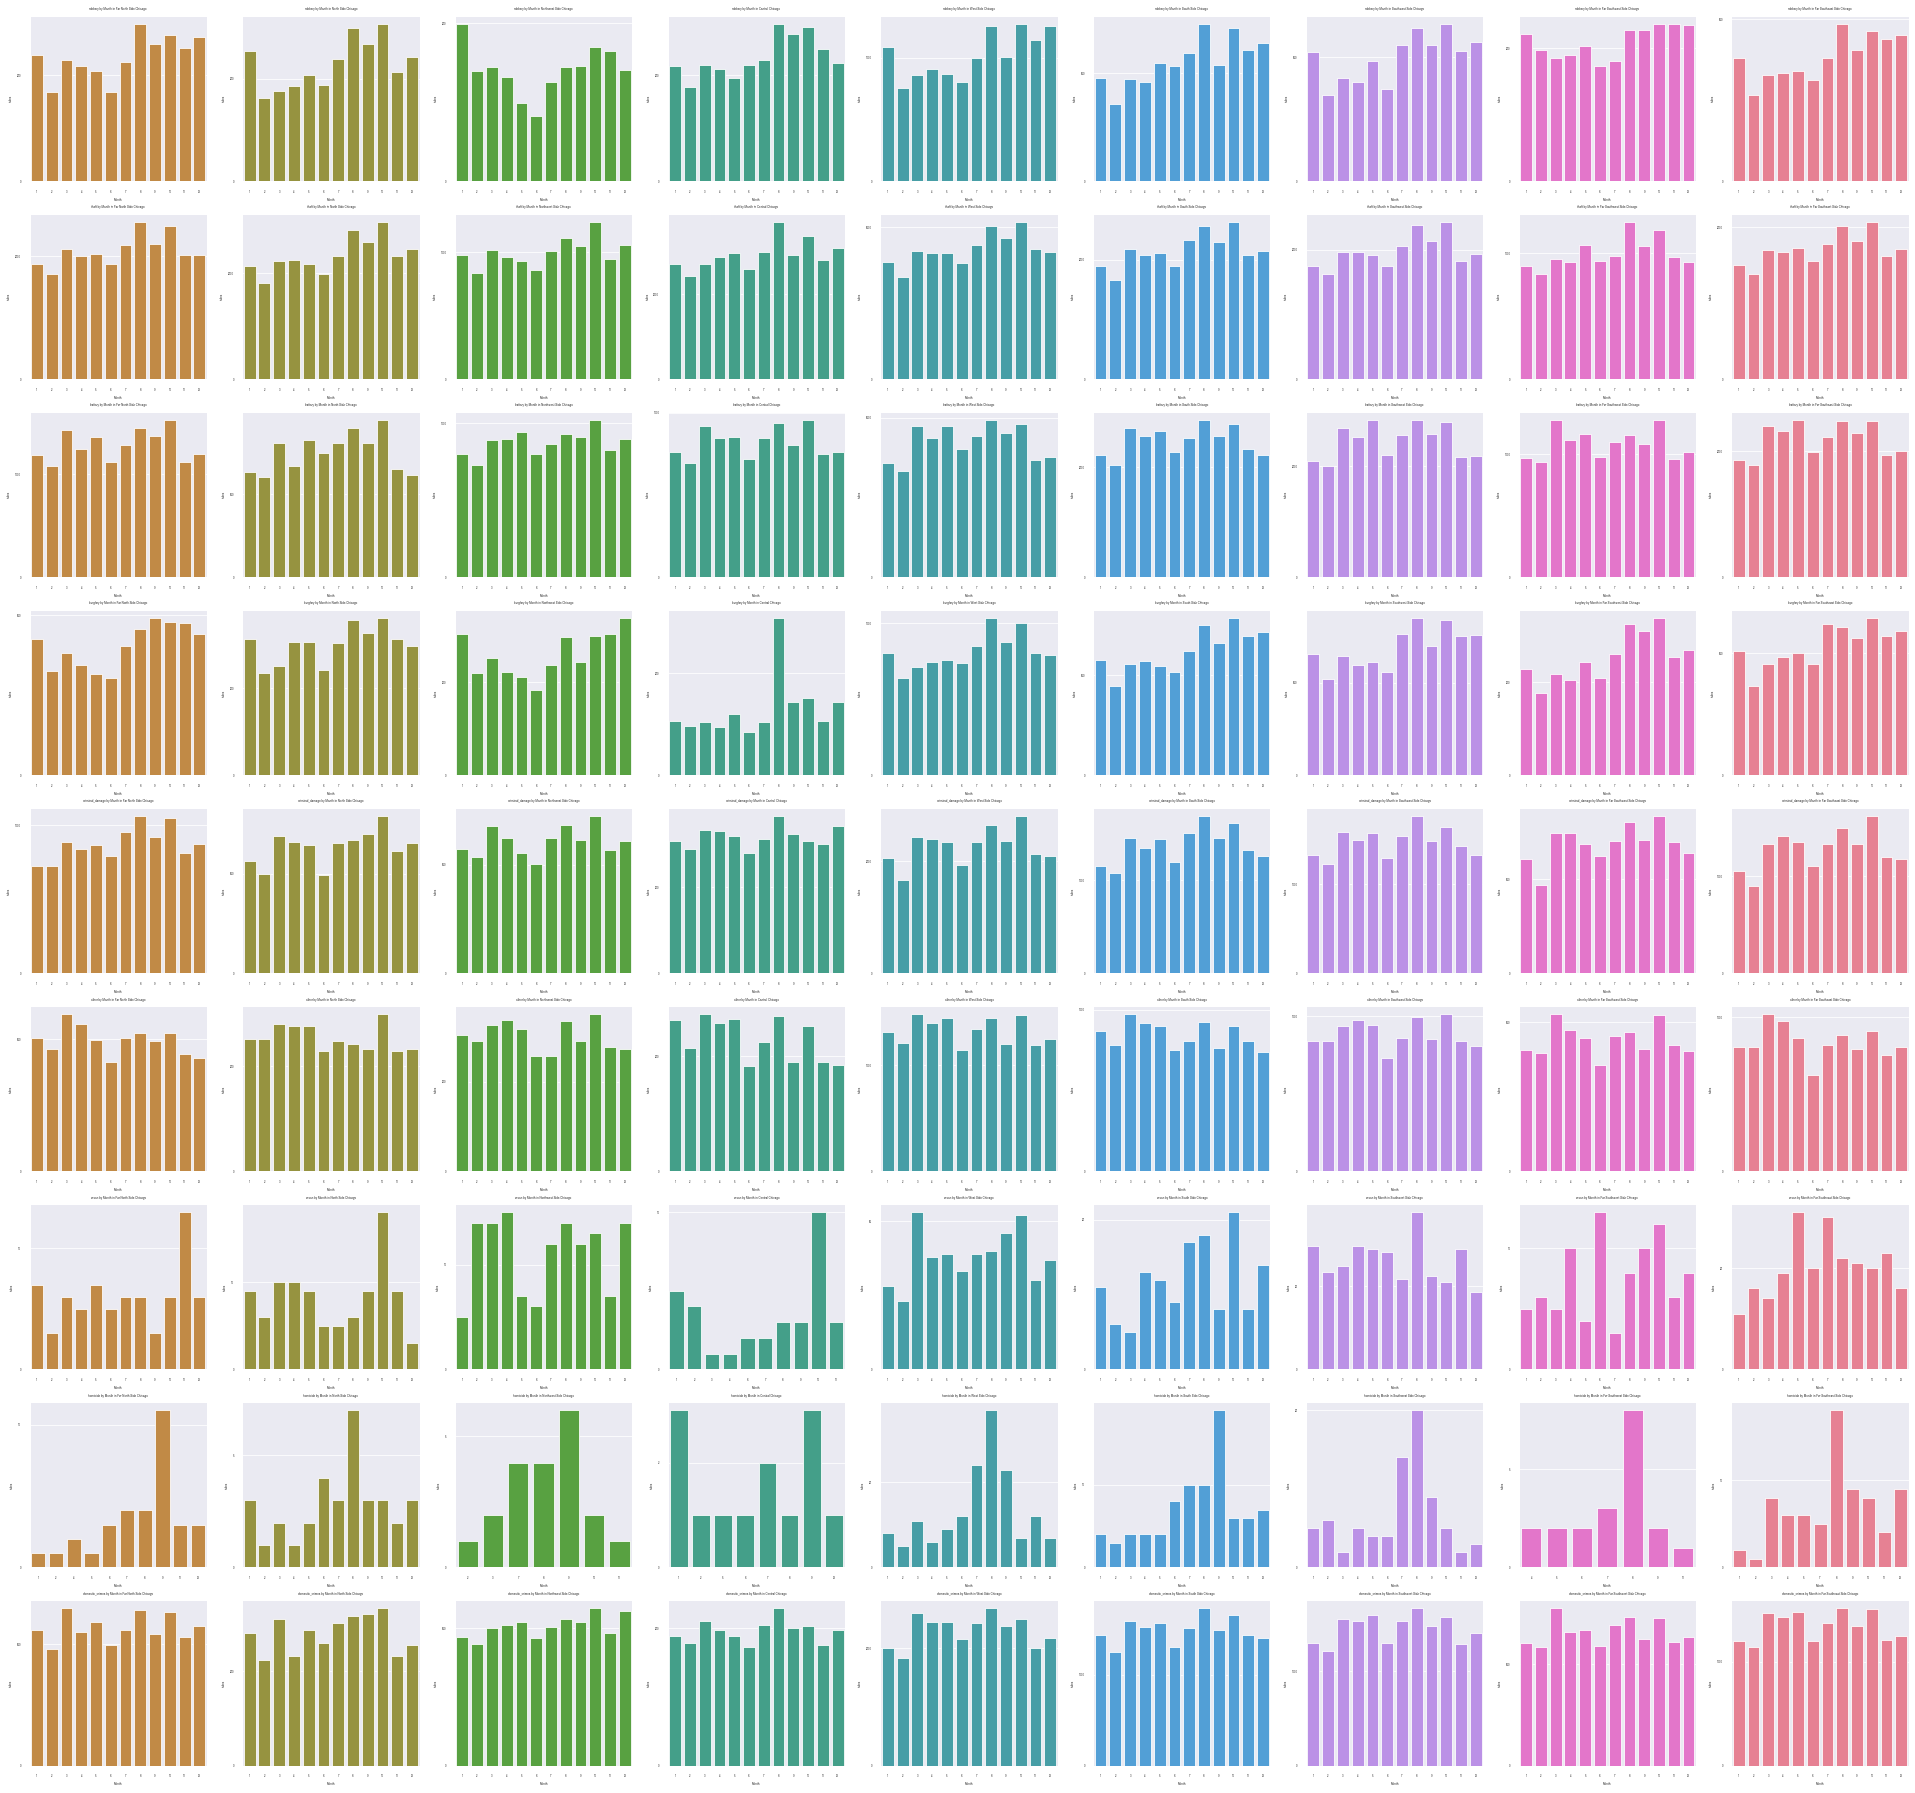

In [463]:
with sns.plotting_context('paper', font_scale = .7):
    fig, axes = plots.subplots(9,9, figsize= (30, 30))
    axes = axes.flatten()
    i = 0
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sides= ['Far North Side', 'North Side','Northwest Side','Central','West Side','South Side','Southwest Side','Far Southwest Side','Far Southeast Side']
    for key, crime in crimes_dict.items():
        for side in sides:
            temp = crime[crime['Side'] == side].groupby('Month').count()
            temp.reset_index(inplace = True)
            fig = sns.barplot(ax= axes[i], x = 'Month', y= 'index', data = temp, color = next(pallete2))
            axes[i].set(xlabel = months, ylabel = f'{key}', title = f'{key} by Month in {side} Chicago' )
            i+=1
        

        

9

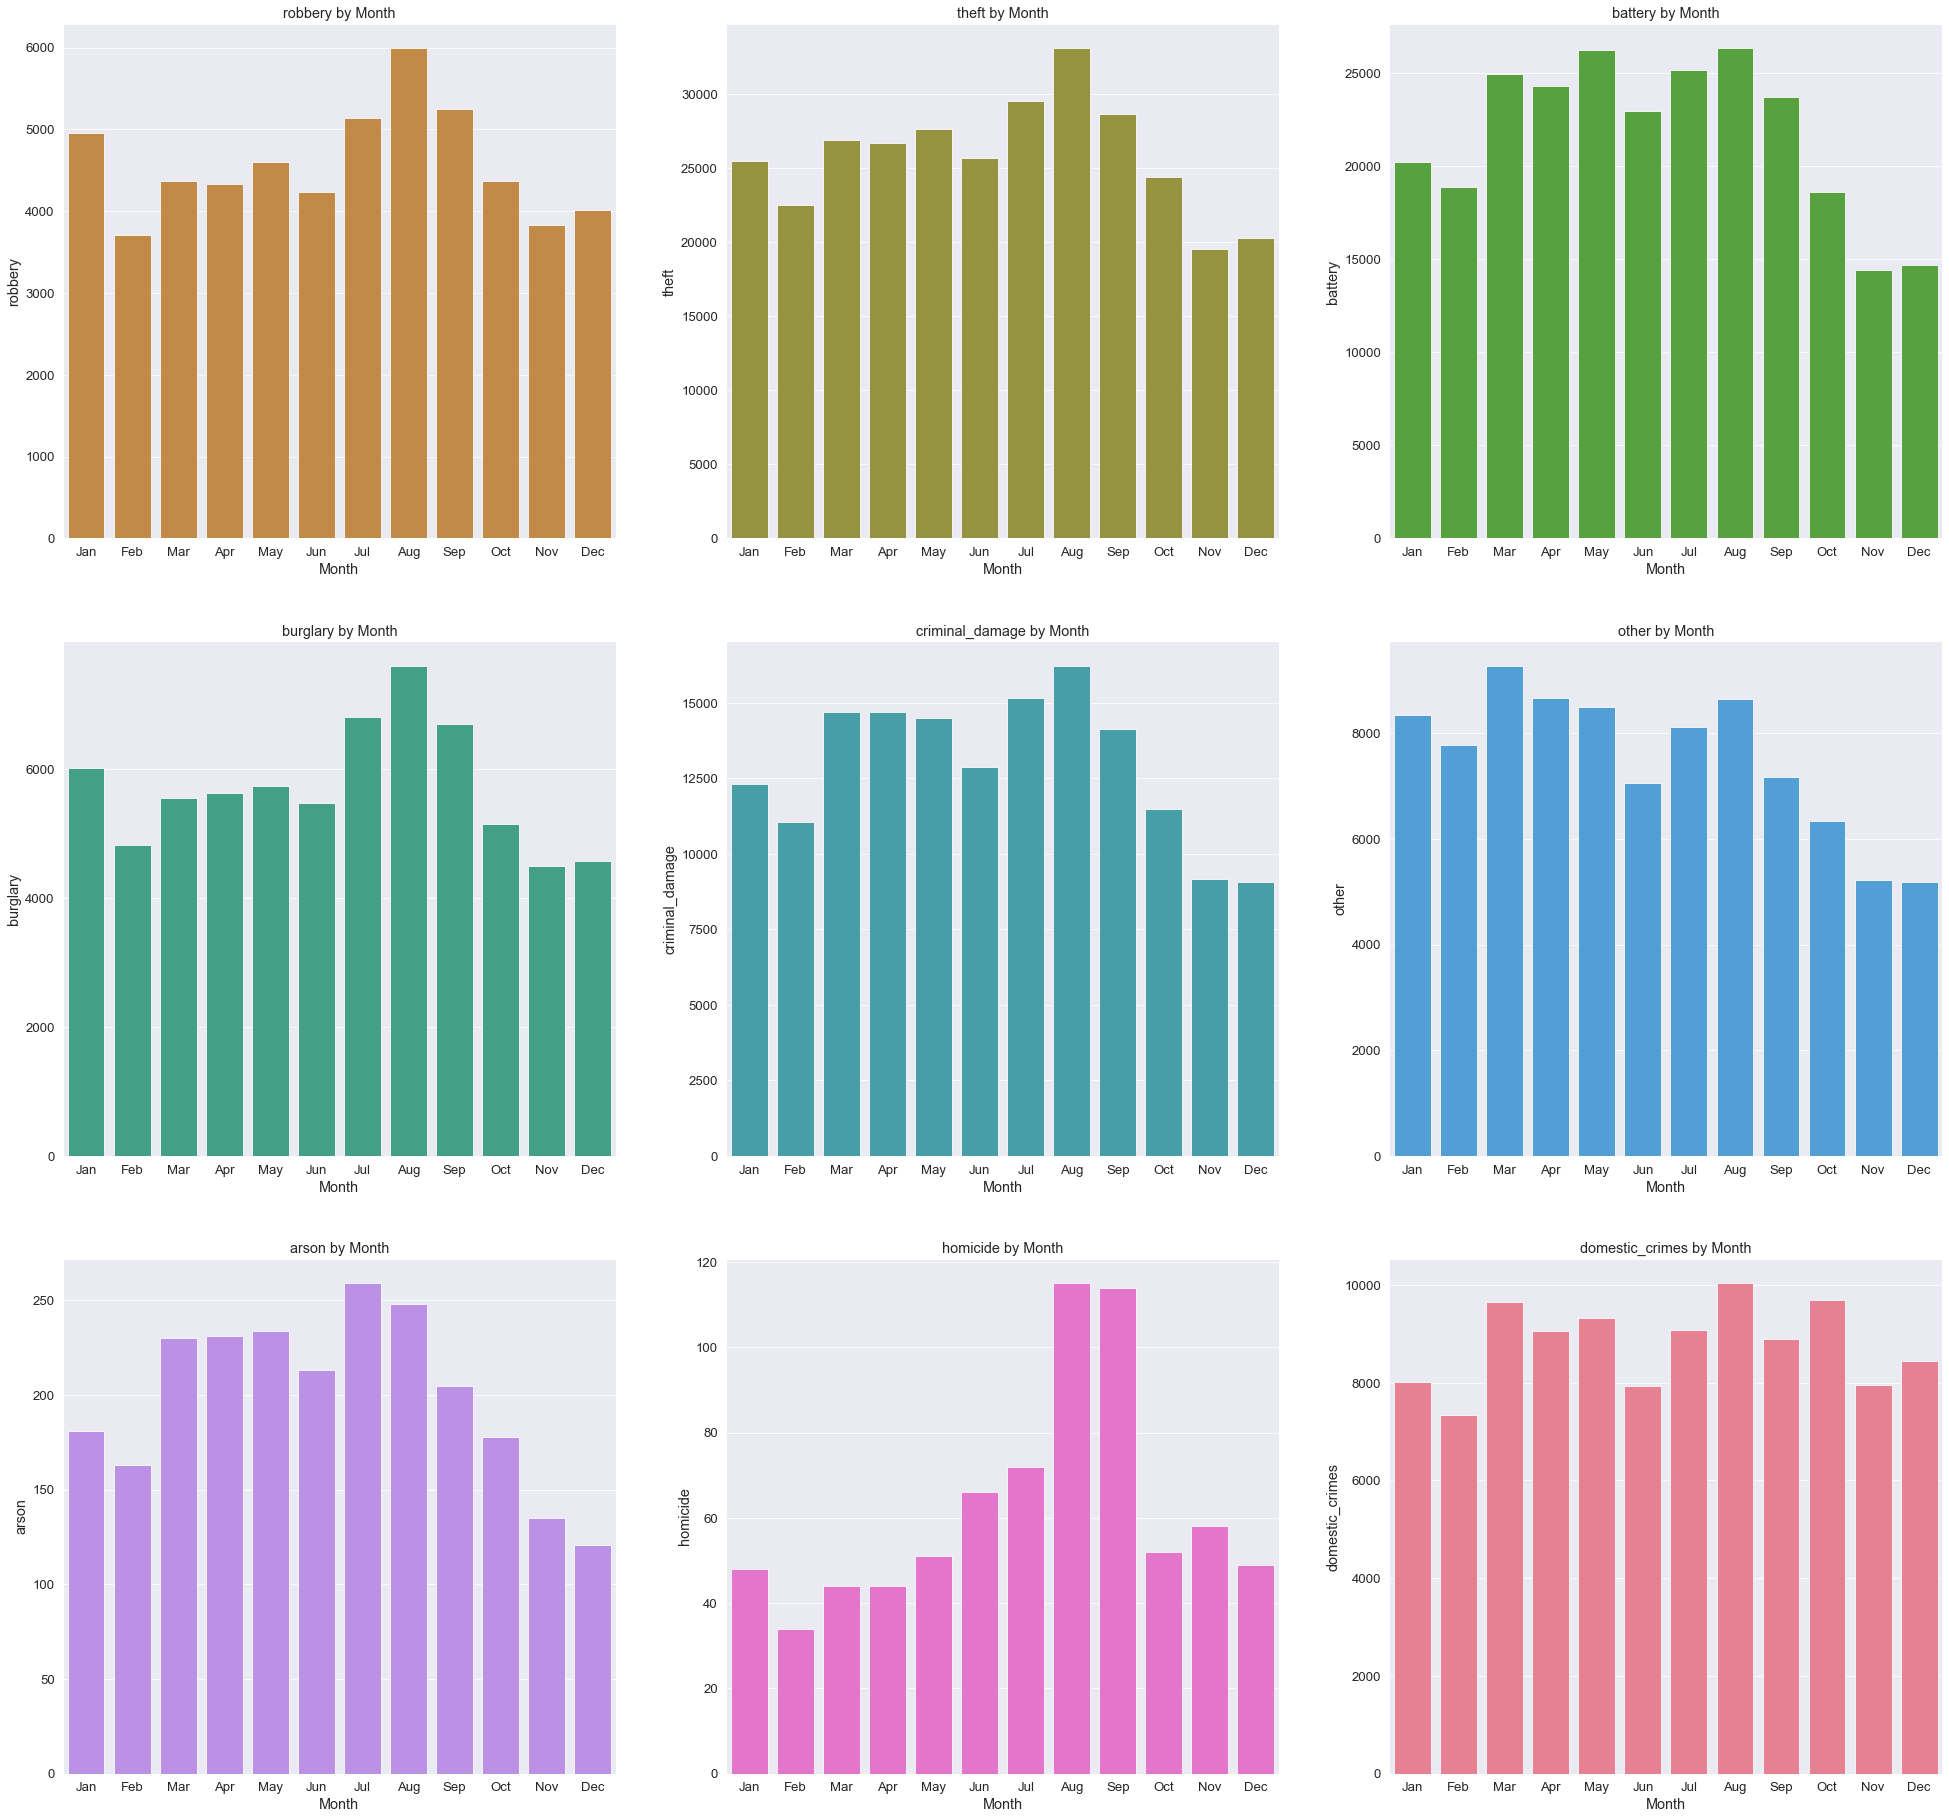

In [462]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
with sns.plotting_context('paper', font_scale = 2):
    i = 0
    fig, axes = plots.subplots(3,3, figsize= (30, 30))
    axes = axes.flatten()
    for key, crime in crimes_dict.items():
        temp = crime.groupby('Month').count()
        temp.reset_index(inplace = True)
        fig = sns.barplot(ax = axes[i], x = 'Month', y= 'index', data = temp, color = next(pallete2))
        axes[i].set_xticklabels(months)
        axes[i].set(ylabel=key, title = f'{key} by Month')
        i+=1


In [480]:
temp = crimes_dict['homicide'][(crimes_dict['homicide']['Year']>=2015) & (crimes_dict['robbery']['Year']<=2019)].groupby('Year').size()
temp

Year
2015     6
2016     5
2017     3
2018    10
2019    10
2020    13
dtype: int64

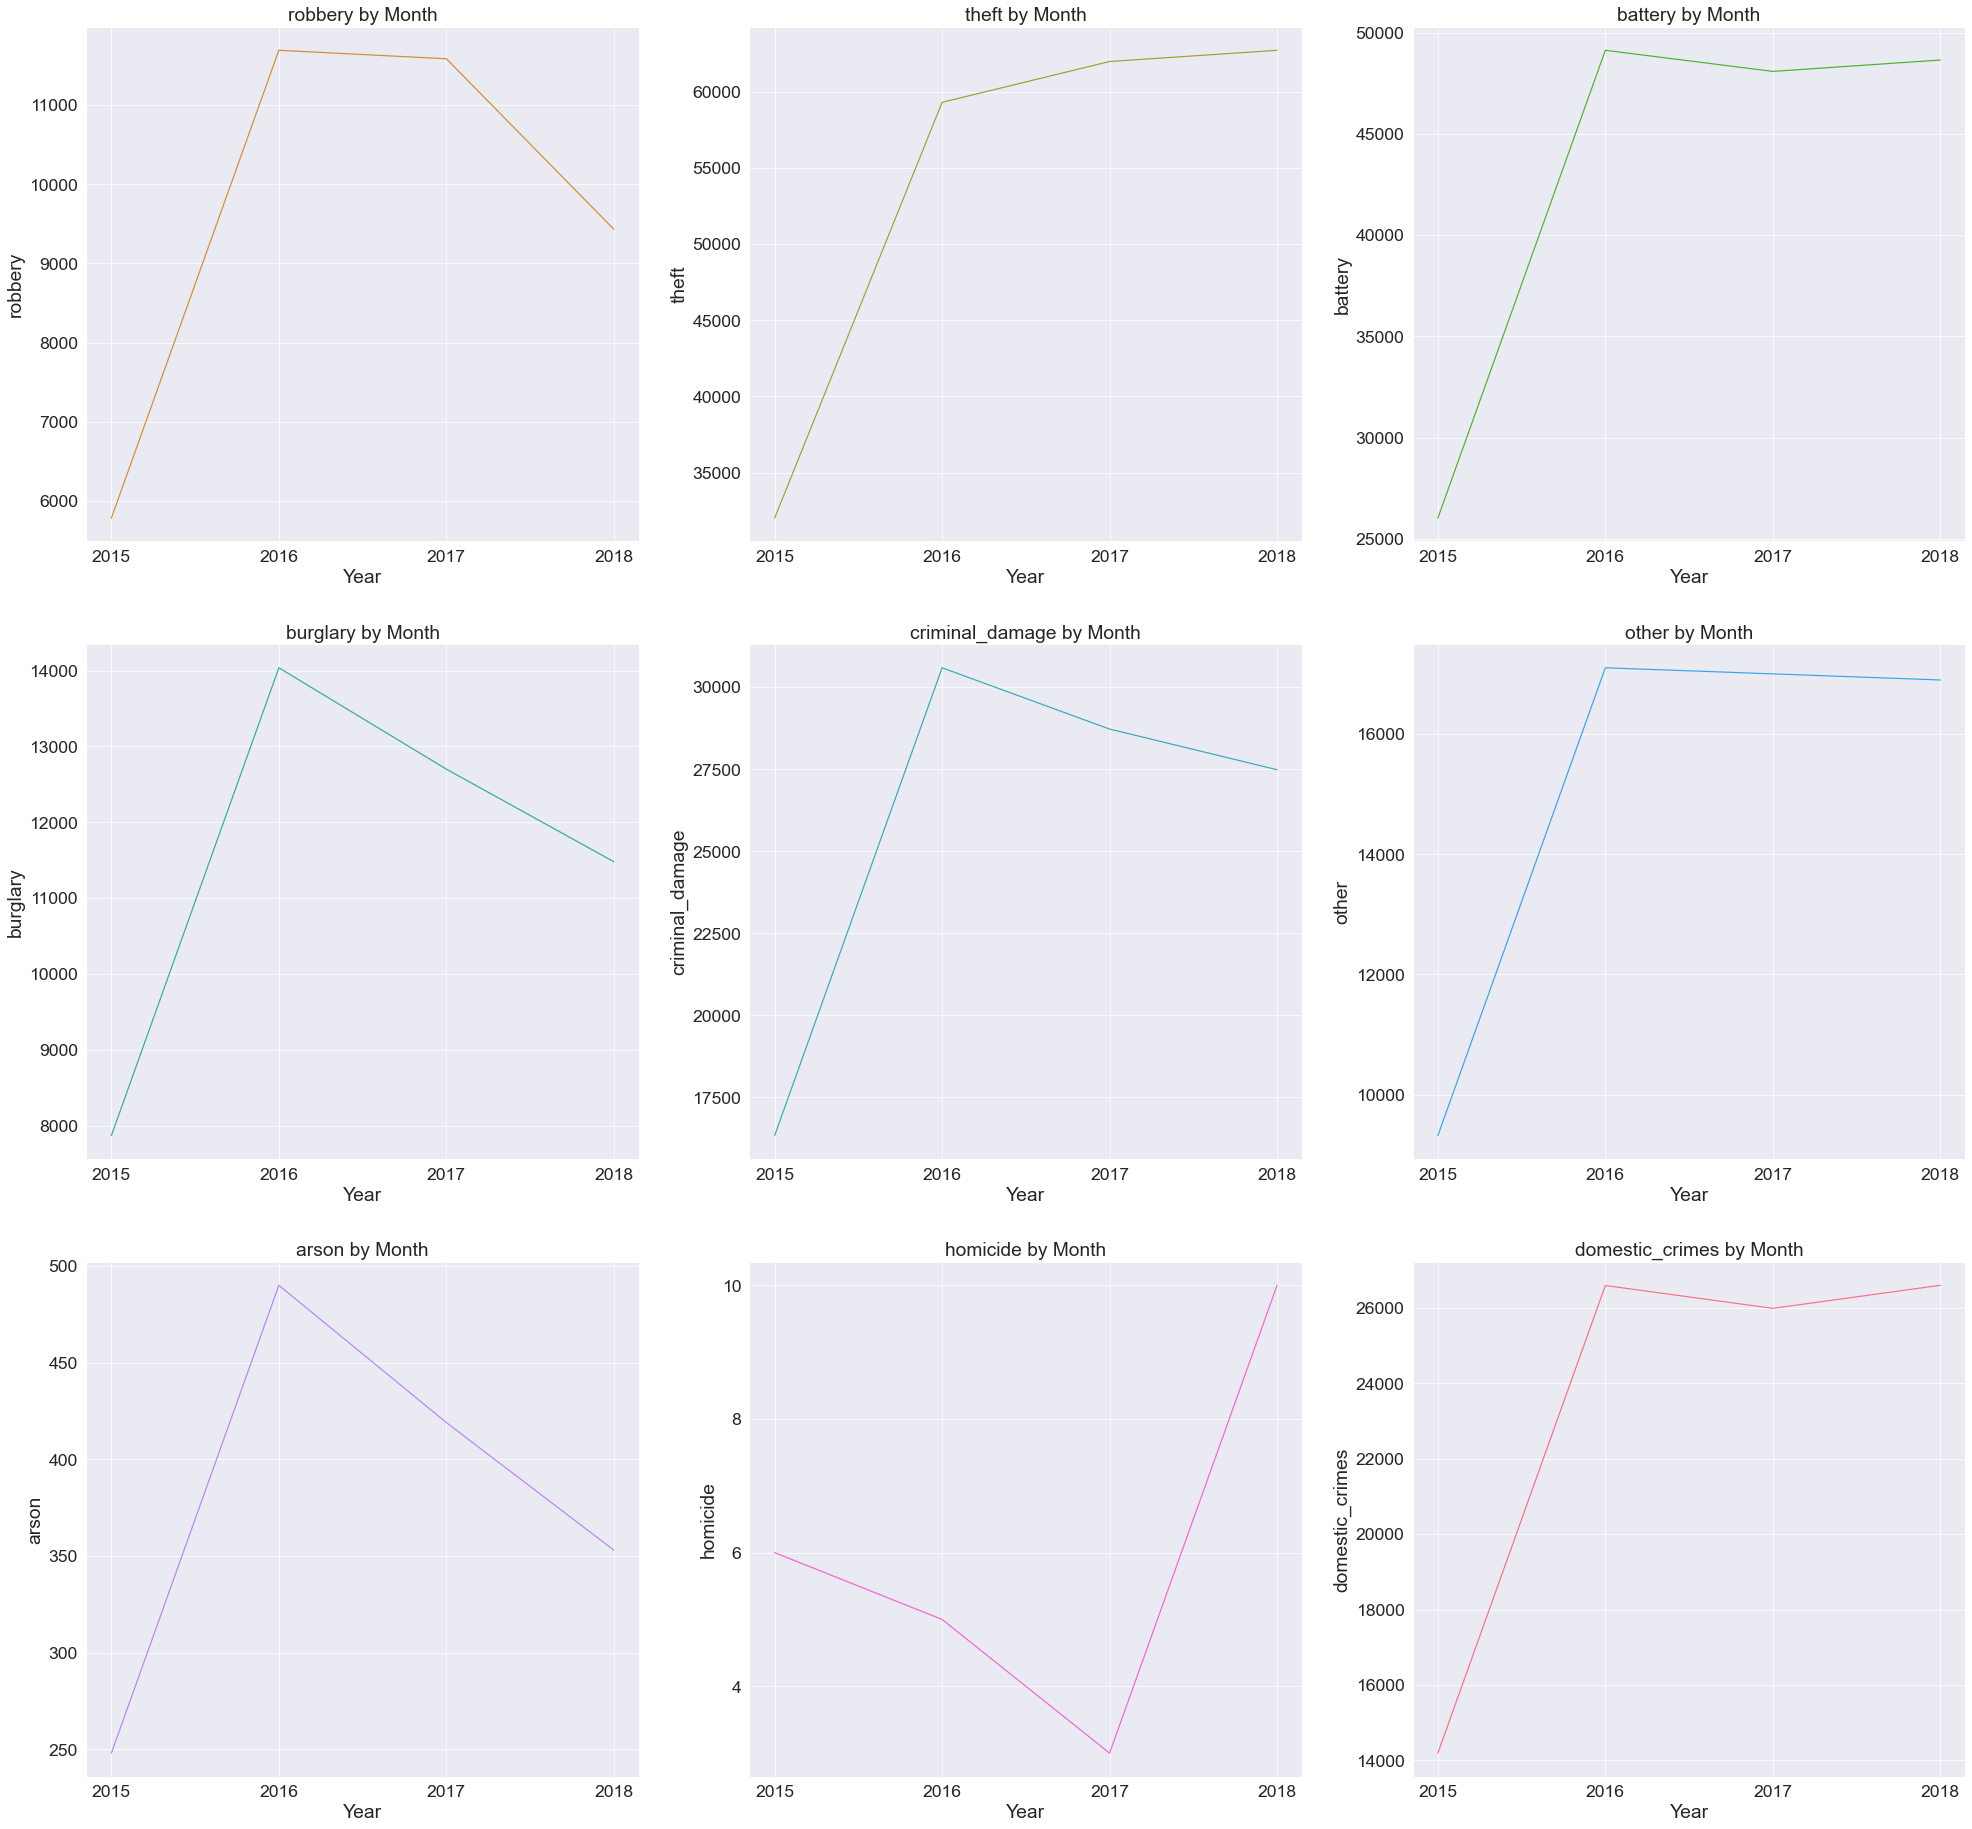

In [477]:

with sns.plotting_context('paper', font_scale = 2):
    i = 0
    fig, axes = plots.subplots(3,3, figsize= (30, 30))
    axes = axes.flatten()
    for key, crime in crimes_dict.items():
        temp = crime[(crime['Year']>=2015) & (crime['Year']<=2018)].groupby('Year').count()
        temp.reset_index(inplace = True)
        fig = sns.lineplot(ax = axes[i], x = 'Year', y= 'index', data = temp, color = next(pallete2))
        axes[i].set(ylabel=key, title = f'{key} by Month')
        i+=1

In [ ]:
'''
#with sns.plotting_context('paper'):
    df = crimes_dict['robbery'][crimes_dict['robbery']['Community Area'] == 41].groupby('Year')
    fig ax = subplot(figsize= (10,6))
    fig
'''

In [377]:
Map = Map.sort_values('Area Number')

In [47]:
RobberyCount = []
for i in range(77):
    RobberyCount.append(robbery.groupby('Community Area').count()['index'][i+1])
Map['Robbery Count'] = RobberyCount

<AxesSubplot:>

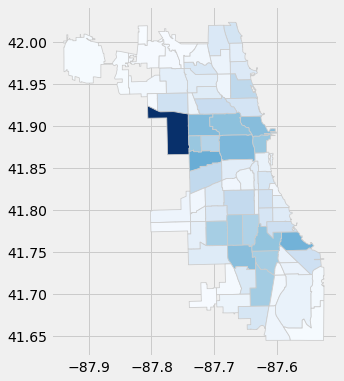

In [48]:
fig, ax = plots.subplots(1, figsize=(10, 6))
Map.plot(column = 'Robbery Count', cmap = 'Blues', linewidth=0.8, ax=ax, edgecolor = '0.8')

In [395]:
temp = crime[crime['Side'] == 'Central'].groupby('Month').count()
temp

index   ID  Case Number  Date  Block  IUCR  Primary Type  Description  \
Month                                                                          
1        189  189          189   189    189   189           189          189   
2        179  179          179   179    179   179           179          179   
3        210  210          210   210    210   210           210          210   
4        198  198          198   198    198   198           198          198   
5        188  188          188   188    188   188           188          188   
6        172  172          172   172    172   172           172          172   
7        205  205          205   205    205   205           205          205   
8        229  229          229   229    229   229           229          229   
9        201  201          201   201    201   201           201          201   
10       203  203          203   203    203   203           203          203   
11       176  176          176   176    176   176           176          176   
12       198  198          198   198    198   198           198          198   

       Location Description  Arrest  ...  Y Coordinate  Year  Updated On  \
Month                                ...                                   
1                       189     189  ...           188   189         189   
2                       179     179  ...           179   179         179   
3                       210     210  ...           209   210         210   
4                       198     198  ...           198   198         198   
5                       188     188  ...           185   188         188   
6                       172     172  ...           172   172         172   
7                       205     205  ...           204   205         205   
8                       229     229  ...           228   229         229   
9                       201     201  ...           201   201         201   
10                      203     203  ...           203   203         203   
11                      176     176  ...           176   176         176   
12                      198     198  ...           198   198         198   

       Latitude  Longitude  Location  Day  Hour  Day of Week  Side  
Month                                                               
1           188        188       188  189   189          189   189  
2           179        179       179  179   179          179   179  
3           209        209       209  210   210          210   210  
4           198        198       198  198   198          198   198  
5           185        185       185  188   188          188   188  
6           172        172       172  172   172          172   172  
7           204        204       204  205   205          205   205  
8           228        228       228  229   229          229   229  
9           201        201       201  201   201          201   201  
10          203        203       203  203   203          203   203  
11          176        176       176  176   176          176   176  
12          198        198       198  198   198          198   198  

[12 rows x 27 columns]

In [481]:
Demographics = pd.read_csv('https://raw.githubusercontent.com/dssg/411-on-311/cf09d6b2daa9bfcd55ca96e8bca3de3cf85f337f/data/chicago-community-areas.csv')

In [482]:
Demographics.iloc[1]

Community Area    population
1                      54991
2                      71942
3                      56362
4                      39493
                     ...    
73                     26493
74                     19093
75                     22544
76                     12756
77                     56521
Name: 1, Length: 78, dtype: object

In [484]:
Population = []
for i in range(77):
    Population.append(int(Demographics.iloc[1][i+1]))
Map['Population'] = Population

In [486]:
crimes_dict['arson'].groupby('Community Area').count().head(20)

index  ID  Case Number  Date  Block  IUCR  Primary Type  \
Community Area                                                            
1.0                 9   9            9     9      9     9             9   
2.0                12  12           12    12     12    12            12   
3.0                 9   9            9     9      9     9             9   
4.0                 6   6            6     6      6     6             6   
5.0                 8   8            8     8      8     8             8   
6.0                19  19           19    19     19    19            19   
7.0                13  13           13    13     13    13            13   
8.0                17  17           17    17     17    17            17   
9.0                 4   4            4     4      4     4             4   
10.0                5   5            5     5      5     5             5   
11.0                1   1            1     1      1     1             1   
12.0                1   1            1     1      1     1             1   
13.0               10  10           10    10     10    10            10   
14.0               10  10           10    10     10    10            10   
15.0               21  21           21    21     21    21            21   
16.0               22  22           22    22     22    22            22   
17.0               13  13           13    13     13    13            13   
18.0                2   2            2     2      2     2             2   
19.0               53  53           53    53     53    53            53   
20.0               22  22           22    22     22    22            22   

                Description  Location Description  Arrest  ...  Year  \
Community Area                                             ...         
1.0                       9                     9       9  ...     9   
2.0                      12                    12      12  ...    12   
3.0                       9                     9       9  ...     9   
4.0                       6                     6       6  ...     6   
5.0                       8                     8       8  ...     8   
6.0                      19                    19      19  ...    19   
7.0                      13                    13      13  ...    13   
8.0                      17                    17      17  ...    17   
9.0                       4                     4       4  ...     4   
10.0                      5                     5       5  ...     5   
11.0                      1                     1       1  ...     1   
12.0                      1                     1       1  ...     1   
13.0                     10                    10      10  ...    10   
14.0                     10                    10      10  ...    10   
15.0                     21                    21      21  ...    21   
16.0                     22                    22      22  ...    22   
17.0                     13                    13      13  ...    13   
18.0                      2                     2       2  ...     2   
19.0                     53                    53      53  ...    53   
20.0                     22                    22      22  ...    22   

                Updated On  Latitude  Longitude  Location  Day  Month  Hour  \
Community Area                                                                
1.0                      9         9          9         9    9      9     9   
2.0                     12        12         12        12   12     12    12   
3.0                      9         9          9         9    9      9     9   
4.0                      6         6          6         6    6      6     6   
5.0                      8         8          8         8    8      8     8   
6.0                     19        19         19        19   19     19    19   
7.0                     13        13         13        13   13     13    13   
8.0                     17        17         17        17   17     17

In [490]:
crimes_dict['homicide'].groupby('Community Area').count()['Block']

robbery
theft
battery
burglary
criminal_damage
other
arson
homicide
domestic_crimes


In [175]:
crimes_dict['homicide'].groupby('Community Area').count().index


Float64Index([ 1.0,  2.0,  3.0,  5.0,  6.0,  7.0,  8.0, 12.0, 13.0, 14.0, 15.0,
              16.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0,
              29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0,
              40.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0,
              52.0, 53.0, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 63.0, 65.0, 66.0,
              67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 75.0, 77.0],
             dtype='float64', name='Community Area')

In [487]:
#go through every dataframe
for key, df in crimes_dict.items():
    #areas = df.groupby('Community Area').count().index
    count = []
    indices = set(df.groupby('Community Area').count().index)
    print(key)
    for i in range(77):
        if i+1 in indices:
        #get the count of crimes counted in each area
            count.append(df.groupby('Community Area').count()['Block'][i+1])
        else:
            count.append(0)
    Map[key+'_count'] = count
    #calculate per capita rates per 100 
    Map[key+'per_capita'] = Map[key+'_count']/Map['Population']
    Map[key+'per_1000'] = 1000*Map[key+'per_capita']

Community Area
1.0     10
2.0      2
3.0      6
5.0      6
6.0      7
        ..
71.0     9
72.0     2
73.0     4
75.0     1
77.0     4
Name: Block, Length: 64, dtype: int64

In [568]:
colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
num = 0
import random
#go through each crime category
for key, df in crimes_dict.items():
    if not colors:
        colors =['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn','YlGn']
  
    num+=1
    #choose a random color scheme
    color = random.choice(colors)
    colors.remove(color)
    top_val = Map[key+'per_1000'].max()
    
    Map.plot(column = key+'per_1000', cmap = next(pallete2), linewidth=0.8, ax=ax, edgecolor = '0.8')
    ax.axis('off')
    ax.set_title(f'Fig {num} {key} per 1,000 people', fontdict={'fontsize': '15', 'fontweight' : '3'})
    sm = plots.cm.ScalarMappable(cmap= color, norm=plots.Normalize(vmin=0, vmax=top_val))
    sm._A = []
    cbar = fig.colorbar(sm)

TypeError: 'ABCMeta' object is not subscriptable

In [569]:
n=crimes[crimes['Arrest'] == True].groupby('Community Area').count().shape[0]
arrest_count = []
total_count = []
for i in range(n):
    arrest_count.append(crimes[crimes['Arrest'] == True].groupby('Community Area').count()['Block'][i+1])
    total_count.append(crimes.groupby('Community Area').count()['Block'][i+1])
Map['Crime Count'] = total_count
Map['Arrest Count'] = arrest_count

TypeError: 'ABCMeta' object does not support item assignment

In [495]:
Map['Arrest Rate'] = Map['Arrest Count']/Map['Crime Count']

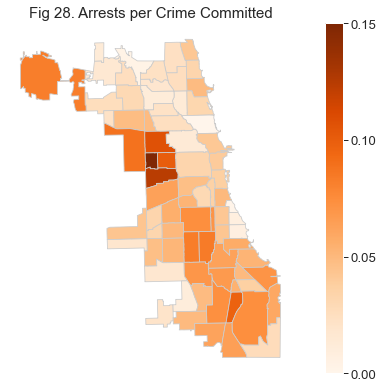

In [504]:
with sns.plotting_context('paper', font_scale = 1.5):
    fig, ax = plots.subplots(1, figsize=(10, 6))
    Map.plot(column = 'Arrest Rate', cmap = 'Oranges', linewidth=0.8, ax=ax, edgecolor = '0.8')
    ax.axis('off')
    ax.set_title('Fig 28. Arrests per Crime Committed', fontdict={'fontsize': '15', 'fontweight' : '3'})
    sm = plots.cm.ScalarMappable(cmap='Oranges', norm=plots.Normalize(vmin=0, vmax=0.15))
    sm._A = []
    cbar = fig.colorbar(sm)

In [506]:
Income =[]
for i in range(77):
    Income.append(float(Demographics.iloc[2][i+1]))
Map['Average Income'] = Income

Latinos= []
for i in range(77):
    Latinos.append(float(Demographics.iloc[4][i+1]))
Map['Latino Proportion'] = Latinos

Blacks = []
for i in range(77):
    Blacks.append(float(Demographics.iloc[5][i+1]))
Map['Black Proportion'] = Blacks
Whites = []
for i in range(77):
    Whites.append(float(Demographics.iloc[6][i+1]))
Map['White Proportion'] = Whites
Asians = []
for i in range(77):
    Asians.append(float(Demographics.iloc[7][i+1]))
Map['Asian Proportion'] = Asians

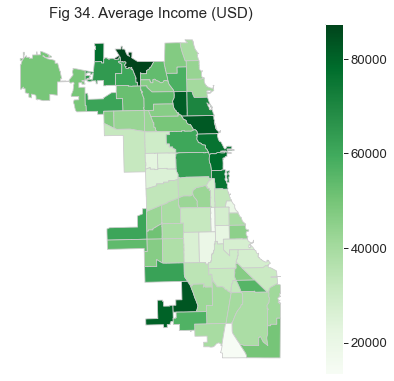

In [507]:
with sns.plotting_context('paper', font_scale = 1.5):
    fig, ax = plots.subplots(1, figsize=(10, 6))
    Map.plot(column = 'Average Income', cmap = 'Greens', linewidth=0.8, ax=ax, edgecolor = '0.8')
    ax.axis('off')
    ax.set_title('Fig 34. Average Income (USD)', fontdict={'fontsize': '15', 'fontweight' : '3'})
    sm = plots.cm.ScalarMappable(cmap='Greens', norm=plots.Normalize(vmin=Map['Average Income'].min(), vmax=Map['Average Income'].max()))
    sm._A = []
    cbar = fig.colorbar(sm)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


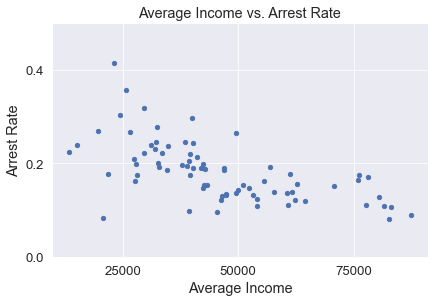

In [515]:
with sns.plotting_context('paper', font_scale = 1.5):
    Map[['Average Income', 'Arrest Rate']].plot.scatter('Average Income', 'Arrest Rate', ylim = (0, 0.5), title = 'Average Income vs. Arrest Rate')

In [517]:
Map['Crimes per 1000'] = 1000*Map['Crime Count']/Map['Population']

The equation of the regression line would be: Arrest Rate = [0.08739976] * Black Proportion + 0.14840797830068775


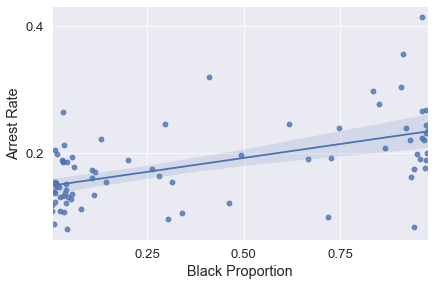

In [525]:
black_arrest_rate = LinearRegression()
black_arrest_rate.fit(Map[['Black Proportion']], Map['Arrest Rate'])
print(f'The equation of the regression line would be: Arrest Rate = {black_arrest_rate.coef_} * Black Proportion + {black_arrest_rate.intercept_}')
with sns.plotting_context('paper', font_scale = 1.5):
    sns.regplot(x = 'Black Proportion', y = 'Arrest Rate', data = Map)

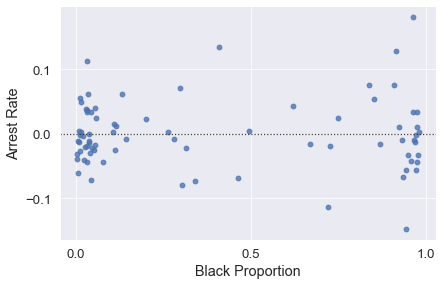

In [524]:
with sns.plotting_context('paper', font_scale = 1.5):
    sns.residplot(x='Black Proportion', y = 'Arrest Rate', data= Map)

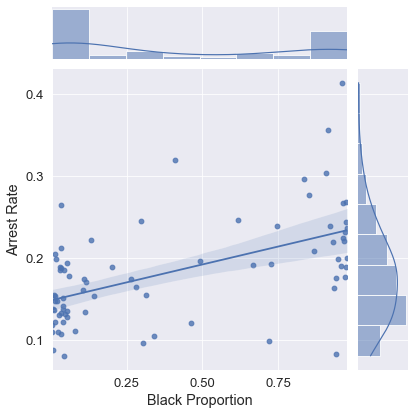

In [551]:
with sns.plotting_context('paper', font_scale = 1.5):
    sns.jointplot(x='Black Proportion', y = 'Arrest Rate', data= Map, kind= 'reg')

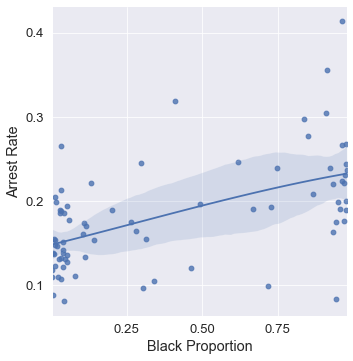

In [547]:
anscombe = sns.load_dataset("anscombe")
with sns.plotting_context('paper', font_scale = 1.5):
    sns.lmplot(x='Black Proportion', y = 'Arrest Rate', data= Map, order = 3)
    #sns.lmplot(x='x', y= 'y', data= anscombe.query("dataset == 'II'"), ci= None)

The equation of the regression line would be: Arrest Rate = [-0.15798249] * Asian Proportion + 0.19119912598017327


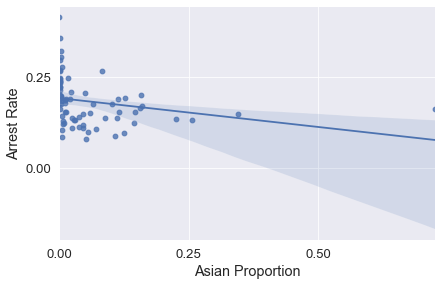

In [552]:
asian_arrest_rate = LinearRegression()
asian_arrest_rate.fit(Map[['Asian Proportion']], Map['Arrest Rate'])
print(f'The equation of the regression line would be: Arrest Rate = {asian_arrest_rate.coef_} * Asian Proportion + {asian_arrest_rate.intercept_}')
with sns.plotting_context('paper', font_scale = 1.5):
    sns.regplot(x = 'Asian Proportion', y = 'Arrest Rate', data = Map)

The equation of the regression line would be: Arrest Rate = [0.08739976] * White Proportion + 0.2209347363598815


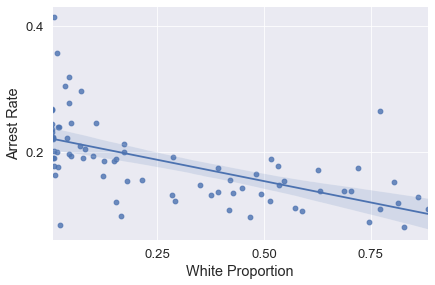

In [557]:
white_arrest_rate = LinearRegression()
white_arrest_rate.fit(Map[['White Proportion']], Map['Arrest Rate'])
print(f'The equation of the regression line would be: Arrest Rate = {black_arrest_rate.coef_} * White Proportion + {white_arrest_rate.intercept_}')
with sns.plotting_context('paper', font_scale = 1.5):
    sns.regplot(x = 'White Proportion', y = 'Arrest Rate', data = Map)

The equation of the regression line would be: Arrest Rate = [-0.01945276] * Latino Proportion + 0.18761994312705874


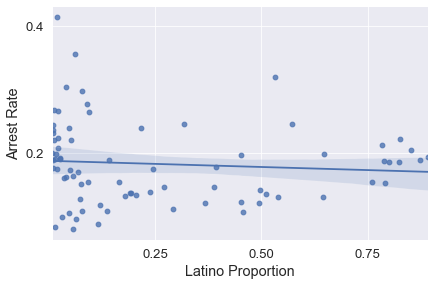

In [558]:
latino_arrest_rate = LinearRegression()
latino_arrest_rate.fit(Map[['Latino Proportion']], Map['Arrest Rate'])
print(f'The equation of the regression line would be: Arrest Rate = {latino_arrest_rate.coef_} * Latino Proportion + {latino_arrest_rate.intercept_}')
with sns.plotting_context('paper', font_scale = 1.5):
    sns.regplot(x = 'Latino Proportion', y = 'Arrest Rate', data = Map)

The equation of the regression line would be Arrest Rate = [-2.24158133e-06]*Income+ 0.2853677843624054


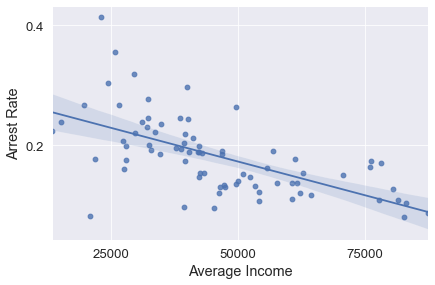

In [556]:
income_arrest_rate = LinearRegression()
income_arrest_rate.fit(Map['Average Income'], Map['Arrest Rate'])
print(f'The equation of the regression line would be Arrest Rate = {income_arrest_rate.coef_}*Income+ {income_arrest_rate.intercept_}')
with sns.plotting_context('paper', font_scale = 1.5):
    sns.regplot(x = 'Average Income', y = 'Arrest Rate', data = Map)